# WRF LES mode sanity checks

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary-and-questions" data-toc-modified-id="Summary-and-questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary and questions</a></span><ul class="toc-item"><li><span><a href="#Stratospheric-relaxation----target-profile" data-toc-modified-id="Stratospheric-relaxation----target-profile-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Stratospheric relaxation -- target profile</a></span></li></ul></li><li><span><a href="#Settings" data-toc-modified-id="Settings-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Settings</a></span></li><li><span><a href="#Read-data" data-toc-modified-id="Read-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Model-setup" data-toc-modified-id="Model-setup-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model setup</a></span><ul class="toc-item"><li><span><a href="#Model-settings-and-initial-profiles" data-toc-modified-id="Model-settings-and-initial-profiles-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Model settings and initial profiles</a></span></li><li><span><a href="#Initial-profiles-vs.-1-km-RCE-profiles" data-toc-modified-id="Initial-profiles-vs.-1-km-RCE-profiles-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Initial profiles vs. 1 km RCE profiles</a></span></li><li><span><a href="#Surface-temperatures" data-toc-modified-id="Surface-temperatures-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Surface temperatures</a></span></li><li><span><a href="#Fixed-radiative-cooling-profile" data-toc-modified-id="Fixed-radiative-cooling-profile-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Fixed radiative cooling profile</a></span></li><li><span><a href="#Wind-relaxation" data-toc-modified-id="Wind-relaxation-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Wind relaxation</a></span></li><li><span><a href="#Stratospheric-temperature-and-moisture-relaxation" data-toc-modified-id="Stratospheric-temperature-and-moisture-relaxation-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Stratospheric temperature and moisture relaxation</a></span></li></ul></li><li><span><a href="#Radiative-convective-equilibrium-(RCE)" data-toc-modified-id="Radiative-convective-equilibrium-(RCE)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Radiative-convective equilibrium (RCE)</a></span><ul class="toc-item"><li><span><a href="#Time-series-of-precipitable-water-(PW)" data-toc-modified-id="Time-series-of-precipitable-water-(PW)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Time series of precipitable water (PW)</a></span></li><li><span><a href="#Convective-structure-during-RCE" data-toc-modified-id="Convective-structure-during-RCE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Convective structure during RCE</a></span></li></ul></li><li><span><a href="#Other-profiles-by-time" data-toc-modified-id="Other-profiles-by-time-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Other profiles by time</a></span><ul class="toc-item"><li><span><a href="#Temperature" data-toc-modified-id="Temperature-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Temperature</a></span></li><li><span><a href="#Water-vapour-mixing-ratio" data-toc-modified-id="Water-vapour-mixing-ratio-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Water vapour mixing ratio</a></span></li><li><span><a href="#Relative-humidity" data-toc-modified-id="Relative-humidity-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Relative humidity</a></span></li></ul></li><li><span><a href="#Mean-temperature-and-humidity-profiles-over-RCE-periods" data-toc-modified-id="Mean-temperature-and-humidity-profiles-over-RCE-periods-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Mean temperature and humidity profiles over RCE periods</a></span></li></ul></div>

## Summary and questions

### Stratospheric relaxation -- target profile

- Temperature $T$ and water vapour mixing ratio $q$ are relaxed towards target profiles above 160 hPa. 
- In the 1 km run the target profiles are the RCEMIP profiles.
- In the LES run the target profiles are the mean profiles of the 1 km RCE run. 

In [1]:
import modules.wrf_perturbation as wp
import matplotlib.pyplot as plt
import numpy as np
import datetime
import xarray

print("Report last updated at " + str(datetime.datetime.utcnow()) + ' UTC.')

Report last updated at 2021-03-08 03:51:19.974928 UTC.


## Settings

In [52]:
# Input directories with dataset names as keys.
basedir = '/g/data/up6/tr2908/em_quarter_ss/v4.1.4/original_1km/output/'
inputs = {'LES': {'RCE': basedir+'/LES/RCE/'},
          '1 km': {'RCE': basedir+'1km/RCE/'}}

# Figure settings.
plt.rcParams['figure.figsize'] = wp.FIGURE_SIZE  # Figure size for non-facetted plots.
plt.rcParams['font.size'] = 14                   # Font size for plots.
plt.rcParams['axes.formatter.useoffset'] = False # Don't use offsets in plots.

# Analysis settings. 
start_times = {'LES':  '2000-04-01', 
               '1 km': '2000-03-25'} 
end_times   = {'LES':  '2000-05-03', 
               '1 km': '2000-05-03'} 
               
plot_levels = [850, 500, 410, 150] # Pressure levels to plot individually [hPa].

## Read data

In [4]:
wrfvars = wp.read_wrfvars(inputs=inputs)

Reading LES dataset: RCE...
Reading 1 km dataset: RCE...


## Model setup 

### Model settings and initial profiles

- The 1 km runs are started and run to RCE using the RCEMIP initial profile.
- LES runs are started and run to RCE using an initial profile taken from the RCE state of the 1 km run.
- Although radiation schemes are selected, the radiation scheme is **not called** if a constant radiative cooling profile is used.

Full settings for the LES run are as follows:

Model setup for LES:
Sea surface temperature (SST):			301.15 K
Surface skin temperature (TSK):			301.15 K
Soil temperature at lower boundary (TMN):	301.15 K
Horizontal grid spacing (DX):			100.0 m
Horizontal (S-N) grid spacing (DY):		100.0 m
Horizontal (W-E) domain size:			200 mass points
Horizontal (S-N) domain size:			200 mass points
Vertical domain size:				370 mass points
Maximum geopotential height (model-top):	32649.7 m
Maximum base-state height (on mass points):	32595.1 m
Minimum, mean, maximum between-level distance:	7.0, 88.3, 106.1 m
Model-top pressure:				603.8 Pa
Coriolis sine latitude term (F):		0.0 s-1
Coriolis cosine latitude term (E):		0.0 s-1
Use light nudging on U and V:			False
Ideal evaporation/surface fluxes:		True
Surface wind for ideal surface fluxes:		4.8 m s-1
Constant radiative cooling profile:		True
Relax stratsopheric T and q profiles?		True
Relax U and V to set profiles?			True
Wind relaxation time:				345600.0 s
Physics schemes:
	Microphysics:				8 (Thomps

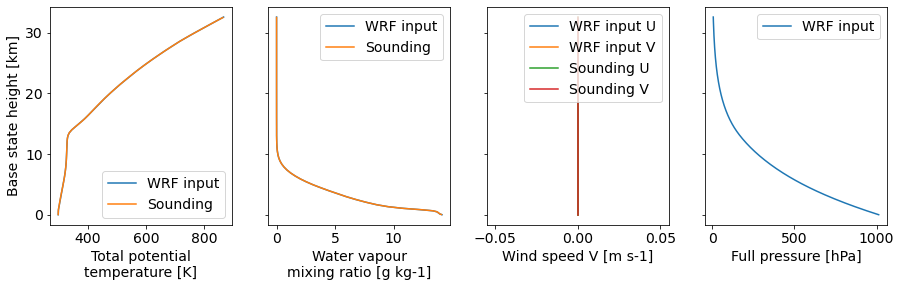

Model setup for 1 km:
Sea surface temperature (SST):			301.15 K
Surface skin temperature (TSK):			301.15 K
Soil temperature at lower boundary (TMN):	301.15 K
Horizontal grid spacing (DX):			1000.0 m
Horizontal (S-N) grid spacing (DY):		1000.0 m
Horizontal (W-E) domain size:			20 mass points
Horizontal (S-N) domain size:			20 mass points
Vertical domain size:				74 mass points
Maximum geopotential height (model-top):	33174.8 m
Maximum base-state height (on mass points):	32998.8 m
Minimum, mean, maximum between-level distance:	75.0, 451.5, 505.5 m
Model-top pressure:				602.0 Pa
Coriolis sine latitude term (F):		0.0 s-1
Coriolis cosine latitude term (E):		0.0 s-1
Use light nudging on U and V:			False
Ideal evaporation/surface fluxes:		True
Surface wind for ideal surface fluxes:		4.8 m s-1
Constant radiative cooling profile:		True
Relax stratsopheric T and q profiles?		True
Relax U and V to set profiles?			True
Wind relaxation time:				345600.0 s
Physics schemes:
	Microphysics:				8 (Thom

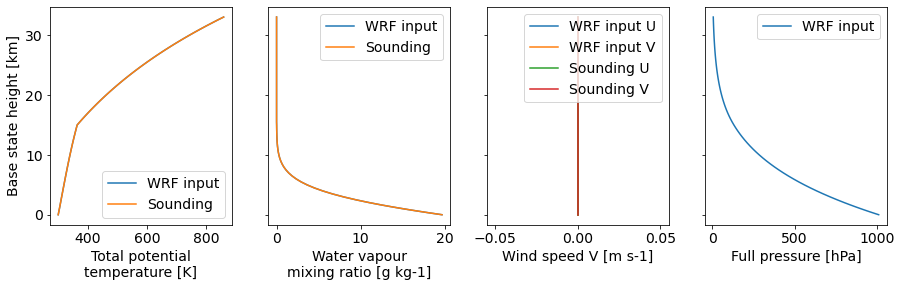

In [5]:
wp.model_setups(inputs=inputs)

The differences between 1 km and LES runs are:

 - Horizontal grid spacing lower in LES runs.
 - Input vertical sounding differences.
 - Vertical grid changed in LES runs, which changes model-top height and model-top pressure.
 - YSL PBL scheme used in 1 km runs and no PBL scheme used in LES runs.

### Initial profiles vs. 1 km RCE profiles

In [6]:
RCE_1km = wrfvars['1 km'].sel(time=slice(start_times['1 km'], end_times['1 km']), Dataset='RCE')
RCE_1km = RCE_1km.mean('time', keep_attrs=True)
first_LES = wrfvars['LES'].isel(time=0, Dataset=0)

Here are plots of the 1 km RCE profiles vs. the profiles in the first time step of the LES simulations, to show that the LES simulations start with the same atmospheric conditions. The wind fields are set to zero in the LES simulations. The titles show the maximum absolute difference between the values interpolated at each vefrtical level. Temperature is perturbation potential temperature (add 300 K to get total potential temperature).

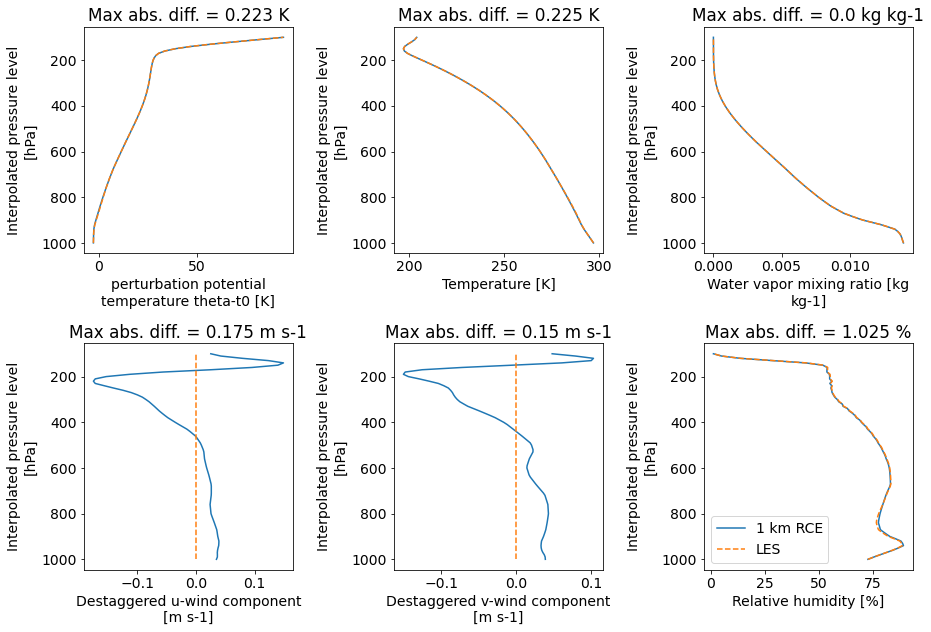

In [7]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(13,9))

for i, var in enumerate(['T', 'tk', 'q', 'ua', 'va', 'rh']):
    RCE_1km[var].plot(y='level', ax=ax.flat[i], label='1 km RCE', yincrease=False)
    first_LES[var].plot(y='level', ax=ax.flat[i], label='LES', linestyle='--', yincrease=False)
    ax.flat[i].set_title('Max abs. diff. = ' + 
                         str(np.round(np.max(np.abs(RCE_1km[var].values - first_LES[var].values)), 3)) + ' ' +
                         RCE_1km[var].attrs['units'])

plt.legend()
plt.tight_layout()
plt.show()

The following plots compare non-interpolated outputs which are specified per eta level, so they are plotted with height in m on the y axis. Again these plots are for the first LES timestep vs. the 1 km RCE mean profiles.

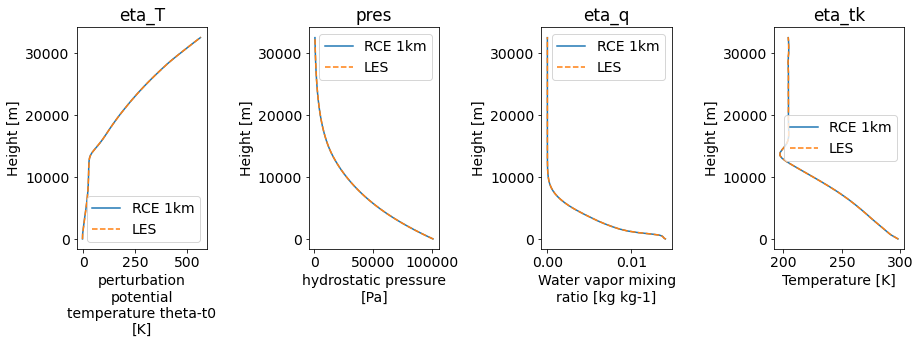

In [8]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(13,5))

for i, var in enumerate(['eta_T', 'pres', 'eta_q', 'eta_tk']):
    ax.flat[i].plot(RCE_1km[var], RCE_1km.z, label='RCE 1km')
    ax.flat[i].plot(first_LES[var], first_LES.z, label='LES', linestyle='--')
    ax.flat[i].set_title(var)
    ax.flat[i].legend()
    ax.flat[i].set_ylabel('Height [m]')
    ax.flat[i].set_xlabel(RCE_1km[var].attrs['long_name'] + ' [' + RCE_1km[var].attrs['units'] + ']')

wp.rewrap_labels(ax)
plt.tight_layout()
plt.show()

### Surface temperatures

The surface is a flat water surface. We use a constant sea surface temperature (SST) set in the `namelist.input` file. The skin surface temperature (TSK) and deep soil temperature (TMN) are set to a constant value $T_s$ based on the initial surface pressure $p_s$ hPa, a reference pressure $p_0 = 100$ hPa, and surface potential temperature $\theta_s$ K, using 

$$
T_s = \theta_s \frac{p_s}{p_0}^{R_d/c_p}
$$

where $c_p$ (J kg$^{-1}$ K$^{-1}$) is specific heat capacity of dry air at constant pressure, and $R_d$ (J kg$^{-1}$ K$^{-1}$) is the gas constant for dry air.

Between the LES and 1 km runs, $R_d/c_p$ and $p_0$ are constant but $\theta_s$ and $p_s$ differ. In the 1 km runs $\theta_s$ and $p_s$ are set by the RCEMIP profile. In the LES runs I interpolated the pressure and potential temperature RCE profiles to the surface and set the input profile to use those values. From the 1 km runs the interpolated RCE surface potential temperature was 296.36 K and the pressure was 1013.3 hPa, but the surface skin temperature was kept constant at 299.99 K. 

For the LES run:

In [9]:
wp.surface_temps(wrf_file=inputs['LES']['RCE'] + '/wrfout_d01_' + start_times['LES'] + '_00:00:00')

Last time stamp in WRF file has SST of 301.15 K and TSK of 301.15 K.


For the 1 km run:

In [10]:
wp.surface_temps(wrf_file=inputs['1 km']['RCE'] + '/wrfout_d01_' + start_times['1 km'] + '_00:00:00')

Last time stamp in WRF file has SST of 301.15 K and TSK of 301.15 K.


### Fixed radiative cooling profile

The radiative cooling profile is kept fixed in all runs, following [Herman and Kuang (2013)](https://doi.org/10.1002/jame.20037). This constant radiation profile replaces the radiation driver entirely. Instead, the value of the potential temperature tendancy due to the radiation scheme ($\theta_{\textrm{tend, rad}}$ in K s$^{-1}$) is set based on the pressure $p$ at each mass point. The value is $\theta_{tend,rad} = t/\Pi$, where $\Pi$ is the Exner function that converts temperature to potential temperature, and $t$ is a temperature tendency set as follows:

 * $t = -1.5$ K day$^{-1}$ if $p \geq 200$ hPa.
 * $t = 0$ K day$^{-1}$ if $p \leq 100$ hPa.
 * $t$'s value varies linearly between -1.5 and 0 K day$^{-1}$ from 100 to 200 hPa.
 
Because $p$ and $\Pi$ are not constant, the values of potential temperature tendency vary slightly in time and space even though the cooling is constant, and the profiles of mean $\theta_{\textrm{tend,rad}}$ are curved. Here I plot mean $\theta_{\textrm{tend,rad}}$ (called `RTHRATEN` in the WRF model).

I believe the small difference here will disappear as more data is added to the LES dataset.

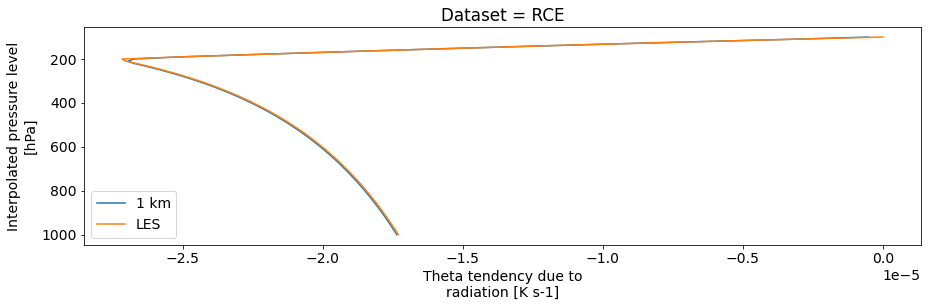

In [11]:
wrfvars['1 km'].RTHRATEN.mean('time', keep_attrs='True').plot(y='level', yincrease=False, label='1 km')
wrfvars['LES'].RTHRATEN.mean('time', keep_attrs='True').plot(y='level', yincrease=False, label='LES')
plt.legend()
plt.show()

The value of `RTHRATEN` is zero everywhere in the first model timestep since no tendency has been provided yet by the model. This first time step is excluded from the following plot which shows the tendancy due to the radiation scheme at various levels by time. First for the 1 km RCE run in which the tendencies have to stabilise:

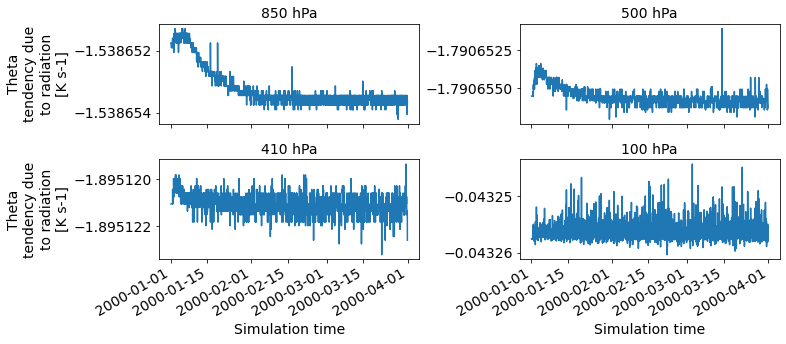

In [12]:
wp.plot_radiative_cooling_by_level(dat=wrfvars['1 km'], plot_levels=plot_levels, figsize=[10.7,5])

And for the LES runs:

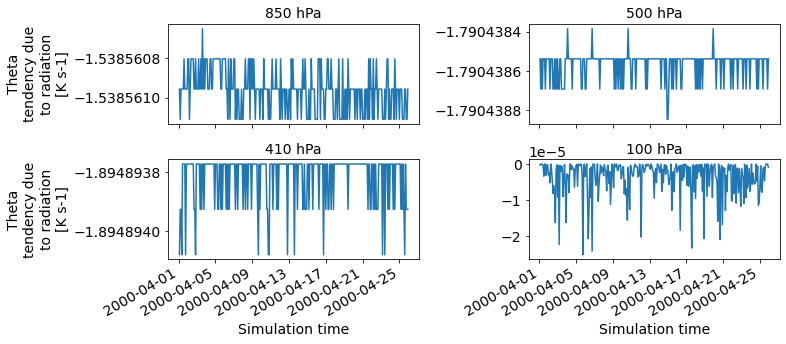

In [13]:
wp.plot_radiative_cooling_by_level(dat=wrfvars['LES'], plot_levels=plot_levels, figsize=[10.7,5])

### Wind relaxation

Horizontal winds $U$ (m s$^{-1}$) and $V$ (m s$^{-1}$) are relaxed to a given vertical profiles which are currently set to zero. (Note in RCE runs the halo and period definitions of wind relaxation fields were incorrect; this was fixed for control + perturbation runs. Also note that in the RCE runs the whole profile was relaxed to zero whereas in the control + perturbation runs only the stratosphere is relaxed to zero). The two following plots show wind magnitude by pressure level by time. Wind magnitude here is calculated using the horizontal mean of $U$ and $V$ per level and time.

LES data are output every 2 hours to save space.

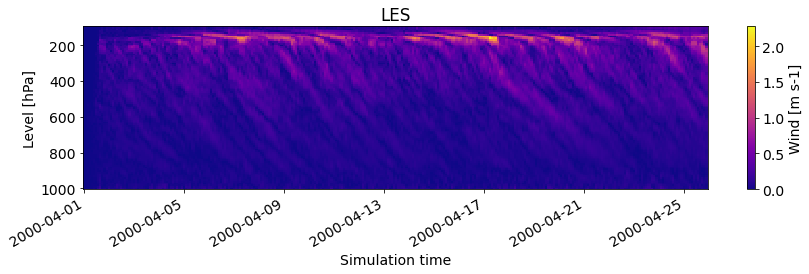

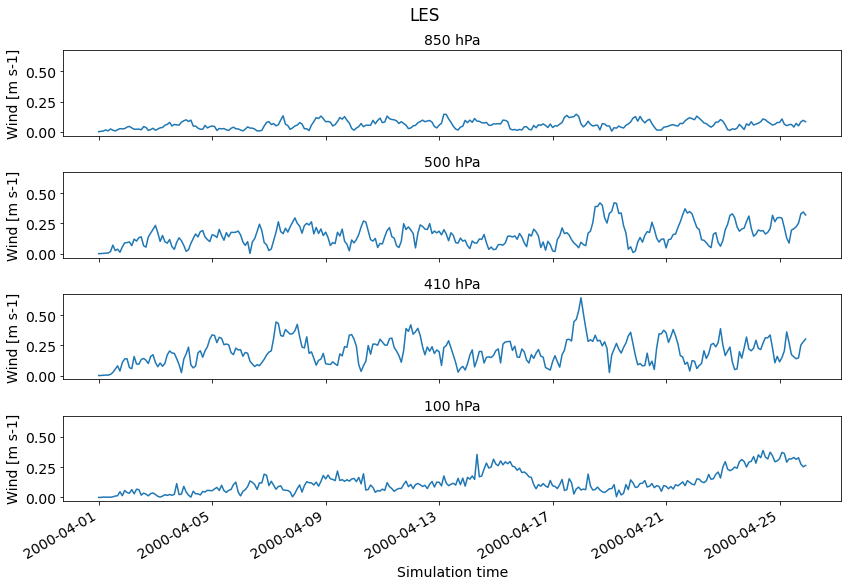

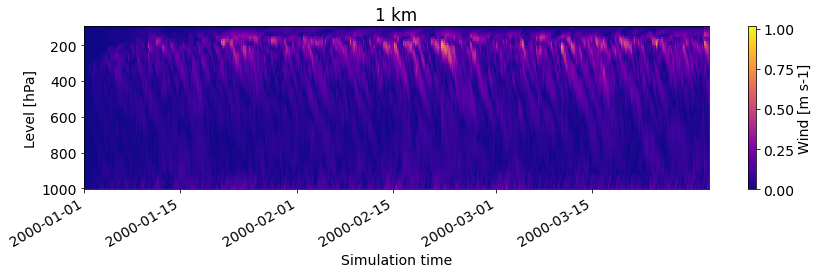

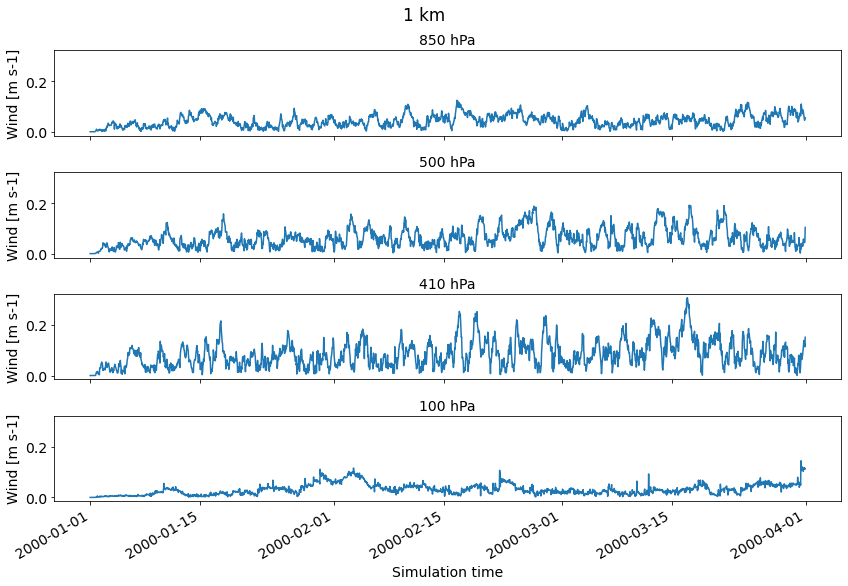

In [15]:
for res in inputs.keys():
    wind = wp.wind(dat=wrfvars[res])
    wp.plot_wind(wind=wind, figsize=[14,3], title=res)
    wp.plot_wind_levels(wind=wind, plot_levels=plot_levels, figsize=[12,8], title=res)

### Stratospheric temperature and moisture relaxation

Temperature and water vapour mixing ratio are relaxed in the stratosphere (above 160 hPa) to RCE profiles (following [Herman and Kuang (2013)](https://doi.org/10.1002/jame.20037)). The reference profile is stored as a value for $T$ and $q$ per vertal level index, not per pressure. 

- For the 1 km run, the reference profile is the profile from the RCEMIP project.
- For the LES run, the reference profile is the profile from the 1 km run, interpolated to the LES eta levels.

The following plots show the mean profiles of $T$ and $q$ on interpolated pressures down to 100 hPa (black line), the range of values over the selected periods (blue shading) and the target profiles in each run (red dots). First for the 1 km runs:

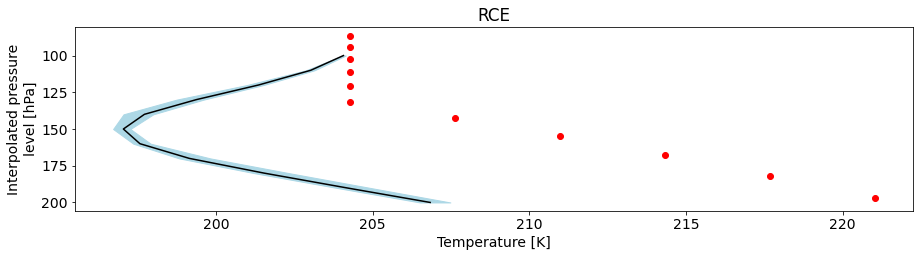

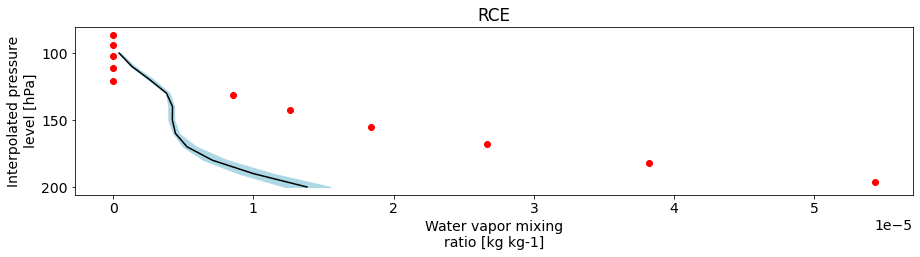

In [16]:
target_profs_1km = wp.target_tk_profiles(wrfout_file=(inputs['1 km']['RCE'] + '/wrfout_d01_' + 
                                                      start_times['1 km'] + '_00:00:00'),
                                         pres=wrfvars['1 km'].pres.isel(Dataset=0),
                                         start=start_times['1 km'], end=end_times['1 km'])

wp.plot_tq_stratosphere(dat=wrfvars['1 km'].sel(time=slice(start_times['1 km'], end_times['1 km'])), 
                        RCE_profiles=target_profs_1km, p_from=200, p_to=80, figsize=[13,4])

And for the LES runs, where you can see that the target profiles are based on the 1 km RCE state.

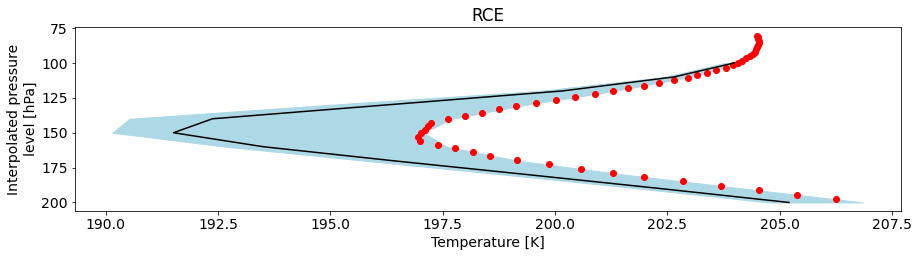

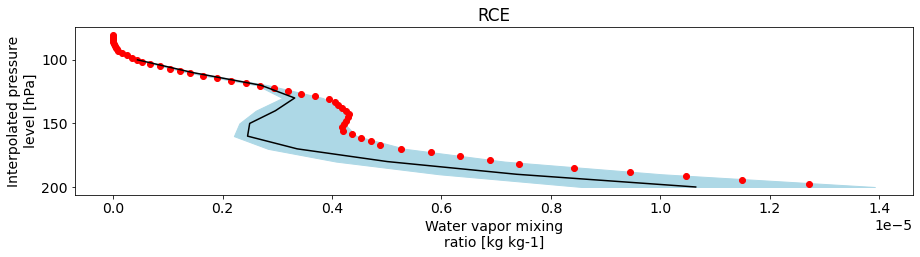

In [17]:
target_profs_LES = wp.target_tk_profiles(wrfout_file=(inputs['LES']['RCE'] + '/wrfout_d01_' + 
                                                      start_times['LES'] + '_00:00:00'),
                                         pres=wrfvars['LES'].pres.isel(Dataset=0),
                                         start=start_times['LES'], end=end_times['LES'])

wp.plot_tq_stratosphere(dat=wrfvars['LES'].sel(time=slice(start_times['LES'], end_times['LES'])), 
                        RCE_profiles=target_profs_LES, p_from=200, p_to=80, figsize=[13,4])

In [18]:
eta_1km = wp.eta_profiles(dat=wrfvars['1 km'], pres=wrfvars['1 km'].sel(Dataset='RCE').pres, 
                          start=start_times['1 km'], end=end_times['1 km'])
eta_LES = wp.eta_profiles(dat=wrfvars['LES'], pres=wrfvars['LES'].sel(Dataset='RCE').pres, 
                          start=start_times['LES'], end=end_times['LES'])

To see the values at $\eta$-levels instead of on interpolated pressures, the following plot shows mean profiles of $T$ and $q$ at $\eta$-level pressures and the target profiles from 200 hPa to 0 hPa. 

In [19]:
target_profs_1km = target_profs_1km.rename({'target_T': 'eta_tk', 'target_q': 'eta_q'})
target_profs_LES = target_profs_LES.rename({'target_T': 'eta_tk', 'target_q': 'eta_q'})

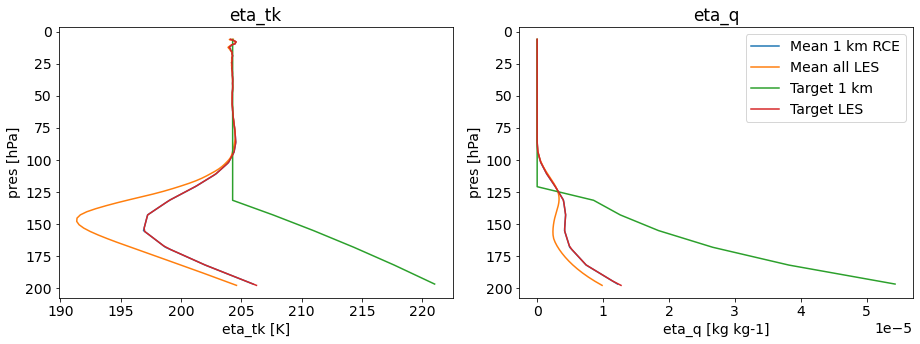

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(13,5))

for i, v in enumerate(['eta_tk', 'eta_q']):
    eta_1km[v].sel(pres=slice(200, 0)).plot(y='pres', yincrease=False, ax=ax[i], label='Mean 1 km RCE')
    eta_LES[v].sel(pres=slice(200, 0)).plot(y='pres', yincrease=False, ax=ax[i], label='Mean all LES')
    target_profs_1km[v].sel(pres=slice(200, 0)).plot(y='pres', yincrease=False, ax=ax[i], label='Target 1 km')
    target_profs_LES[v].sel(pres=slice(200, 0)).plot(y='pres', yincrease=False, ax=ax[i], label='Target LES')
    ax[i].set_title(v)

plt.legend()
plt.tight_layout()
plt.show()

## Radiative-convective equilibrium (RCE)

### Time series of precipitable water (PW)


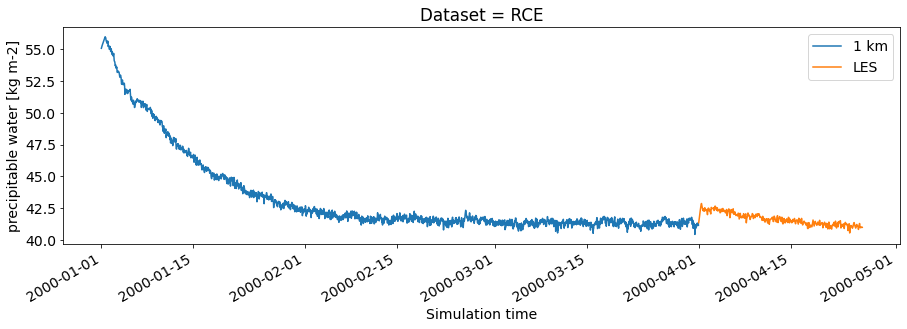

In [22]:
wrfvars['1 km'].pw.plot(hue='Dataset', label='1 km')
wrfvars['LES'].pw.plot(hue='Dataset', label='LES')
plt.legend()

### Convective structure during RCE

Since we do not use the radiation driver, outgoing longwave radiation (OLR) is not calculated in our runs and it is not trivial to visualise the locations of convection. Instead we plot the location of rainfall calculated (without the convective scheme) for the last day of each RCE period. The x and y axes in these plots are pixel numbers.

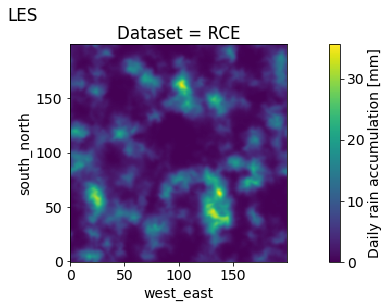

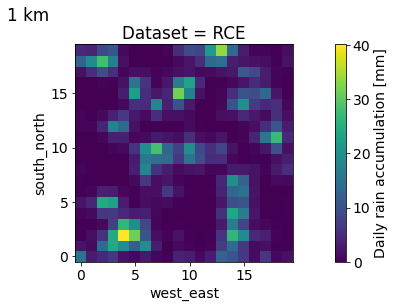

In [26]:
wp.plot_daily_rain(inputs=inputs, patterns={'LES': 'wrfout*2000-04-10*', '1 km': 'wrfout*2000-03-25*'})

## Other profiles by time

### Temperature

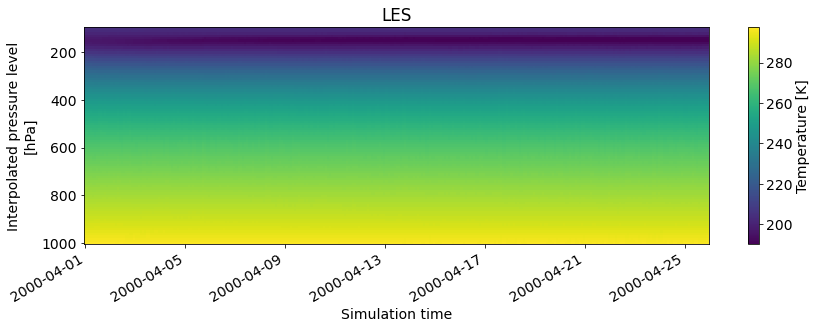

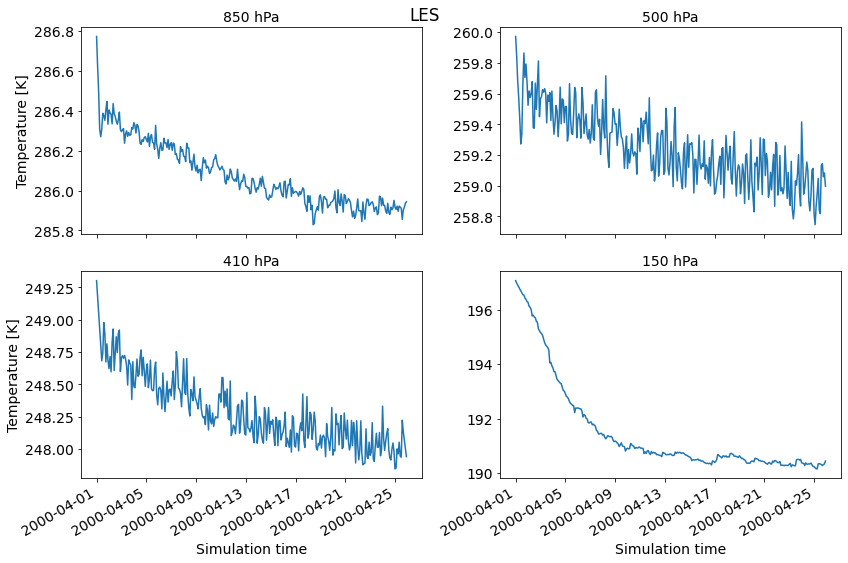

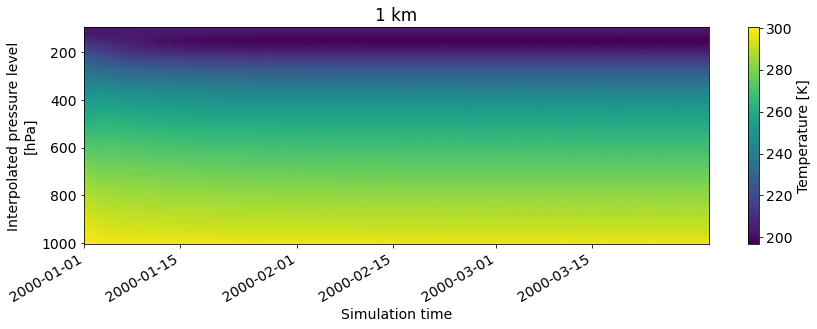

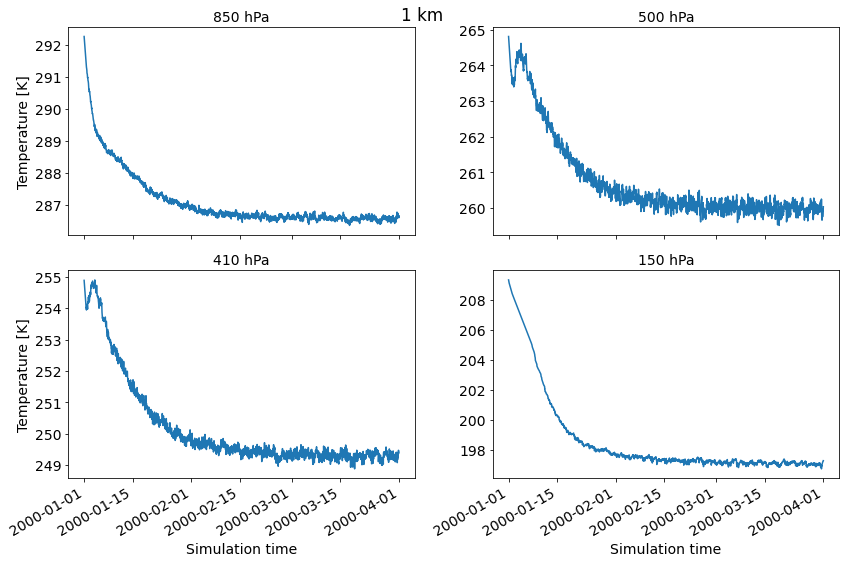

In [56]:
def disp_var(variable):
    for res in wrfvars.keys():
        wrfvars[res][variable].plot(x='time', figsize=(14,4), yincrease=False)
        plt.title(res)
        plt.show()
        wrfvars[res][variable].sel(level=plot_levels).plot(hue='Dataset', col='level', 
                                                           col_wrap=2, figsize=(12,8), 
                                                           sharey=False).set_titles('{value} hPa')
        plt.suptitle(res)
        plt.show()
        
disp_var('tk')

### Water vapour mixing ratio

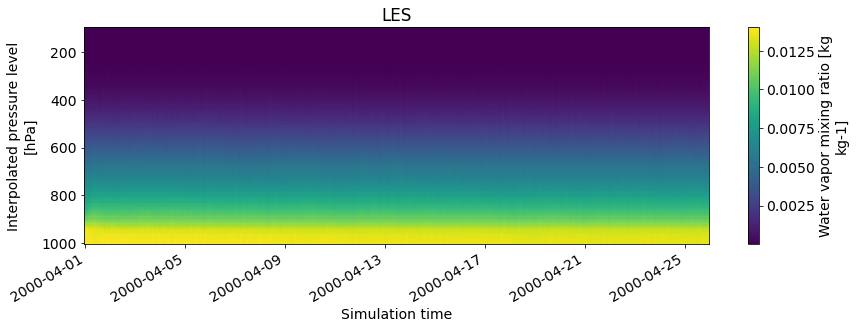

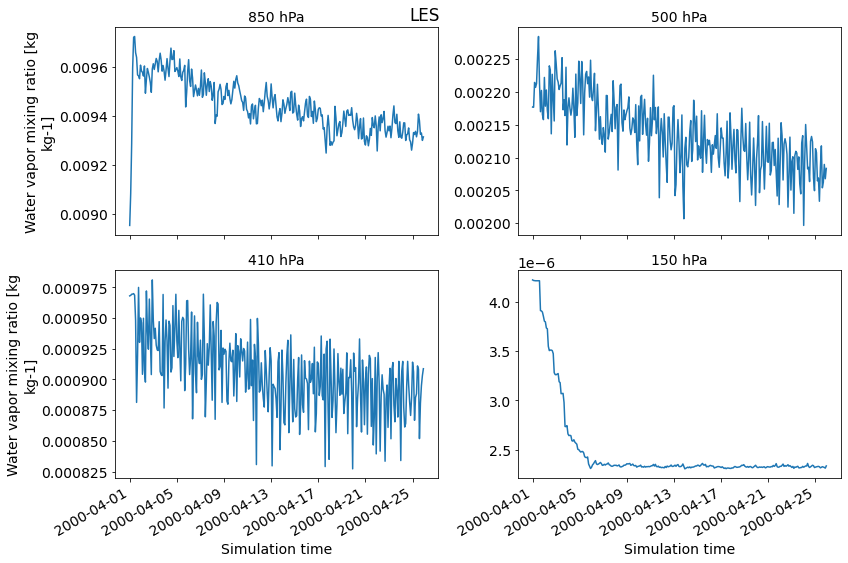

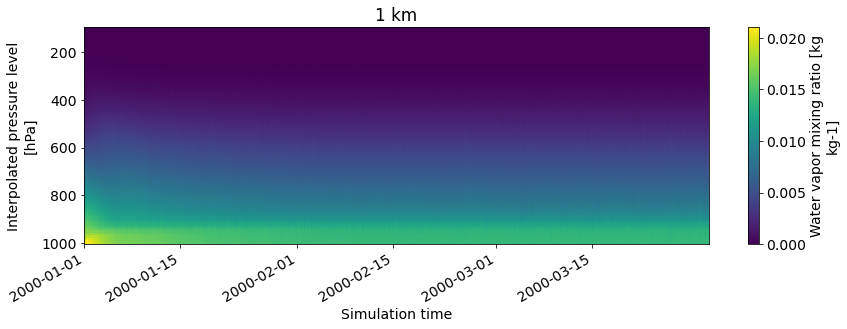

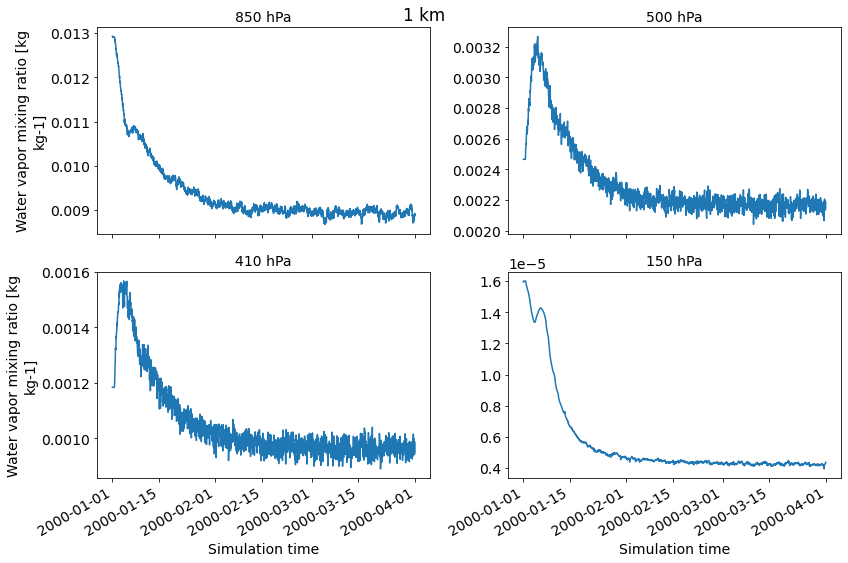

In [57]:
disp_var('q')

### Relative humidity

In these plots you can see the increase in relative humidity in the stratosphere in the LES runs, caused by the incorrect units being used in the $q$ stratospheric target profile.

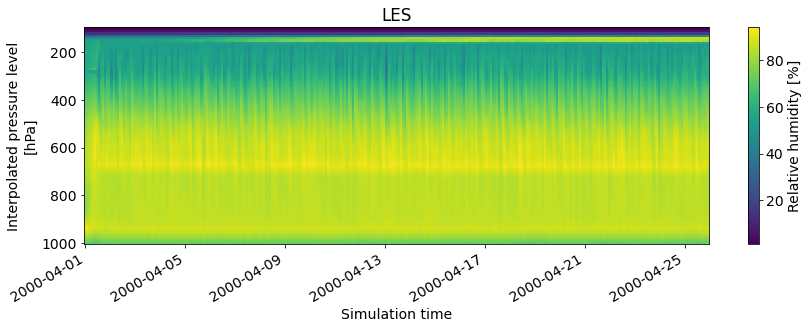

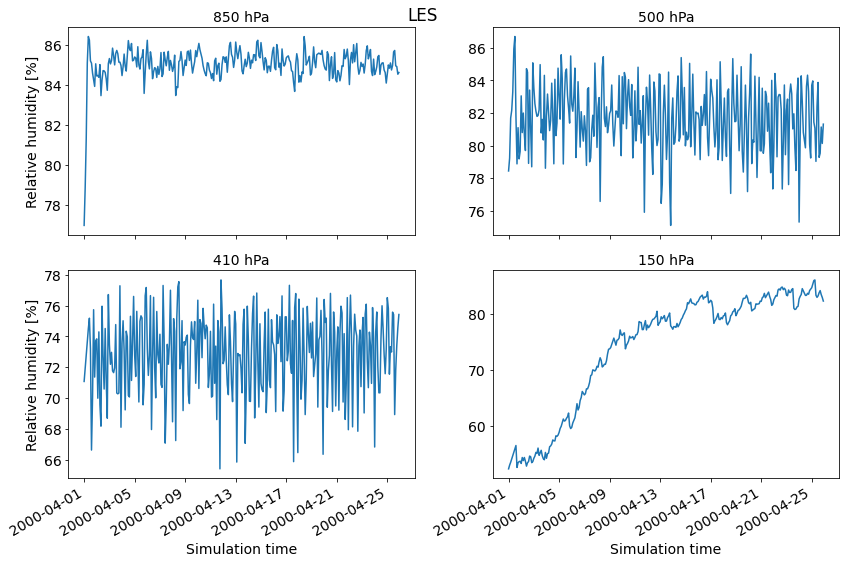

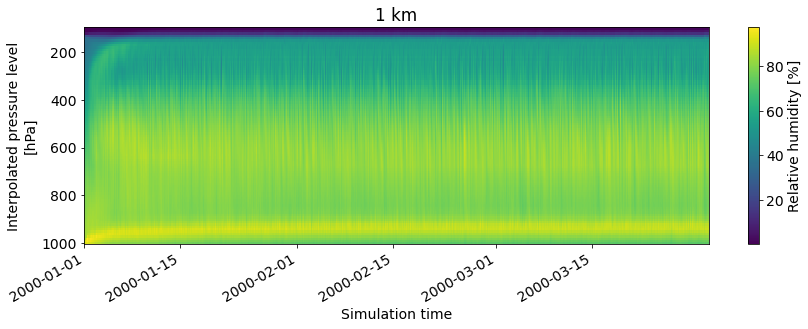

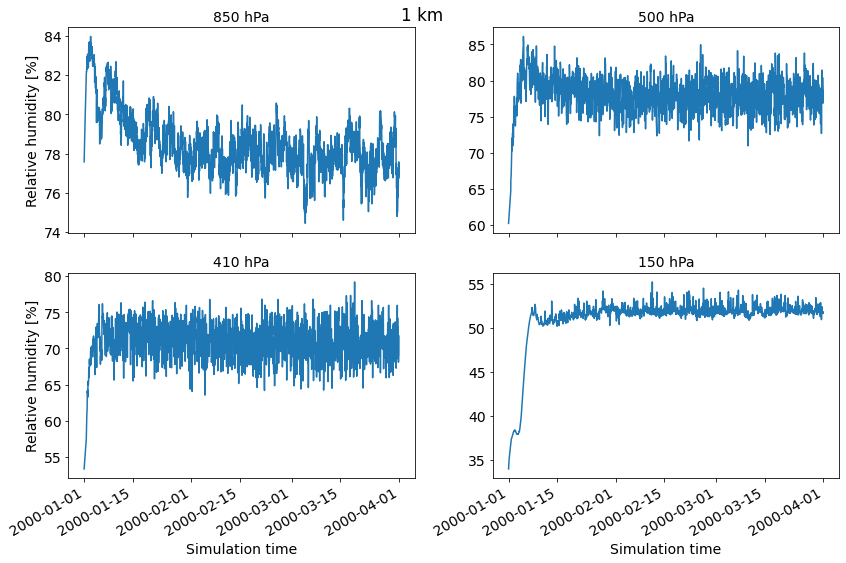

In [58]:
disp_var('rh')